# Introducción a los Modelos de Difusión y Stable Diffusion

## ¿Qué son los Modelos de Difusión?

En su esencia, los Modelos de Difusión son una clase de **modelos generativos** que han revolucionado la creación de contenido visual. A diferencia de otros enfoques, no intentan generar una imagen desde cero directamente, sino que aprenden a **deshacer una imagen en un proceso de ruido gradual**.

Imaginen que tienen una imagen original perfecta. Los modelos de difusión aprenden a añadirle ruido gradualmente hasta que se convierte en puro ruido aleatorio. Luego, invierten este proceso: aprenden a eliminar ese ruido paso a paso hasta recuperar la imagen original (o generar una nueva).

## ¿Para qué se utilizan? Su aplicación principal es la **generación de imágenes realistas** a partir de texto (text-to-image) o a partir de otras imágenes. Sin embargo, su versatilidad va más allá, permitiendo tareas como:
*   **Generación de imágenes:** Crear imágenes nuevas y diversas a partir de una descripción textual (ej. Stable Diffusion, DALL-E 2, Midjourney).*   

* **Edición de imágenes:** Modificar partes de una imagen, completar secciones faltantes (inpainting), o eliminar objetos no deseados (outpainting).*   

* **Super-resolución:** Mejorar la calidad y resolución de imágenes de baja calidad.*   

* **Transferencia de estilo:** Aplicar el estilo de una imagen a otra.

## ¿Cómo funcionan (de forma simplificada)?
###Los Modelos de Difusión operan en dos fases principales, inspiradas en procesos físicos de difusión (como la propagación de calor o el movimiento de partículas):

1.  **Proceso de Difusión (o Adelante/Forward Process):**    *   Este proceso es determinista (conocido) y no se entrena.    *   Toma una imagen original (limpia) y le **añade ruido gaussiano de forma gradual** en una secuencia de pasos.    *   En cada paso, se añade una pequeña cantidad de ruido.    *   Después de muchos pasos, la imagen original se degrada completamente hasta convertirse en puro ruido aleatorio.
2.  **Proceso Inverso (o de Denoising/Reverse Process):**    *   Este es el proceso que el modelo **aprende** a realizar.    *   Toma una imagen ruidosa (que puede ser ruido puro al inicio, o una imagen con ruido añadido) y aprende a **eliminar ese ruido progresivamente** en cada paso.    *   El modelo es una red neuronal (a menudo una U-Net) que se entrena para predecir el ruido añadido en cada paso de reversión.    *   Al "substraer" el ruido predicho iterativamente, la red puede transformar una señal ruidosa en una imagen coherente y realista.    *   Cuando generamos una imagen nueva, empezamos con un vector de ruido aleatorio y el modelo lo "limpia" paso a paso hasta formar una imagen.

## ¿Por qué son tan potentes?*   

**Calidad de imagen:** Son capaces de generar imágenes con un detalle y realismo excepcionales, a menudo superando a otros modelos generativos.*  

**Diversidad:** Pueden generar una amplia variedad de imágenes dado un mismo *prompt* o condición, lo que indica una buena exploración del espacio de datos.*   

**Estabilidad en el entrenamiento:** Tienden a ser más estables y fáciles de entrenar que otras arquitecturas generativas como las GANs (Generative Adversarial Networks), que a menudo sufren de modos colapsados.*   

**Control granular:** Al operar paso a paso, ofrecen un mayor control sobre el proceso de generación y permiten intervenciones para guiar la salida.

## Explorando Stable Diffusion: Generación de Imágenes a partir de Texto

En este cuaderno exploraremos el uso práctico de **Stable Diffusion** para la generación de imágenes a partir de descripciones de texto (`prompts`). Esta es una potente herramienta de IA que nos permite generar imágenes altamente detalladas y creativas.

Comenzaremos con la preparación del entorno, luego exploraremos dos versiones del modelo (V1.5 y 2.1) y finalmente veremos cómo ajustar los parámetros para obtener resultados personalizados.

### 1. Preparación del Entorno
Antes de comenzar, necesitamos instalar las librerías necesarias para trabajar con los modelos de difusión y configurar nuestro entorno para aprovechar la GPU (si está disponible en Google Colab).

In [ ]:
# Paso 1: Instalar las librerías necesarias
# 'diffusers' es la biblioteca principal que proporciona las herramientas para los modelos de difusión.
# 'transformers' se usa para manejar los codificadores de texto que interpretan nuestros prompts.
# 'accelerate' ayuda a optimizar el rendimiento del modelo en diferentes dispositivos (como GPUs).
# '-q' al final significa 'quiet', para que la instalación sea menos verbosa.
!pip install diffusers transformers accelerate -q

# 'torch' es la biblioteca fundamental de PyTorch, necesaria para las operaciones de tensores y redes neuronales.
!pip install torch -q

# 'scipy' es una biblioteca para computación científica, a veces necesaria para algunas funcionalidades internas.
!pip install --upgrade scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.9 MB/s eta 0:00:00


In [ ]:
# Paso 2: Importar las bibliotecas necesarias para nuestro script
# StableDiffusionPipeline es la clase principal de diffusers para cargar y ejecutar los modelos de Stable Diffusion.
from diffusers import StableDiffusionPipeline

# torch es la biblioteca de PyTorch, utilizada aquí para especificar el tipo de datos (ej. float16).
import torch

# IPython.display.display nos permite mostrar imágenes directamente en el cuaderno de Colab.
from IPython.display import display

# PIL (Pillow) es una biblioteca de procesamiento de imágenes que se utiliza para manipular y mostrar las imágenes generadas.
from PIL import Image

### 2. Primer Modelo: Stable Diffusion V1.5
Comenzaremos explorando **Stable Diffusion V1.5**, una versión clásica y ampliamente utilizada. Este modelo es una excelente introducción a la generación de imágenes a partir de texto utilizando técnicas de difusión latente.

In [ ]:
# Paso 3: Cargar el modelo de difusión estable (Stable Diffusion V1.5)
# 'runwayml/stable-diffusion-v1-5' es el identificador del modelo en Hugging Face Hub.
# from_pretrained() descarga y carga los pesos del modelo.
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

# Movemos el modelo a la GPU para acelerar el procesamiento.
# Si no tienes GPU o prefieres usar CPU, puedes cambiar 'cuda' a 'cpu'.
pipe.to("cuda")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.33.1",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
# Paso 4: Definir una función para generar imágenes
def generar_imagen_v1_5(prompt):
    # El método 'pipe()' es el que ejecuta el proceso de difusión para generar la imagen.
    # - prompt: La descripción de texto de la imagen que queremos generar.
    # - num_inference_steps: El número de pasos en el proceso de des-difusión.
    #   Más pasos generalmente resultan en mejor calidad, pero tardan más tiempo.
    # - guidance_scale: Controla qué tan fiel es el resultado al prompt.
    #   Valores más altos hacen que la imagen se adhiera más al prompt, pero pueden reducir la diversidad.
    images = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images
    return images


In [ ]:
# Paso 5: Definir nuestro 'prompt' (descripción textual) para la generación de la imagen.
prompt_v1_5 = "A highly detailed portrait of a person, photographic style, in natural lighting, with expressive eyes and soft shadows"

Generando imagen con el prompt: 'A highly detailed portrait of a person, photographic style, in natural lighting, with expressive eyes and soft shadows' (Stable Diffusion V1.5)...


  0%|          | 0/50 [00:00<?, ?it/s]

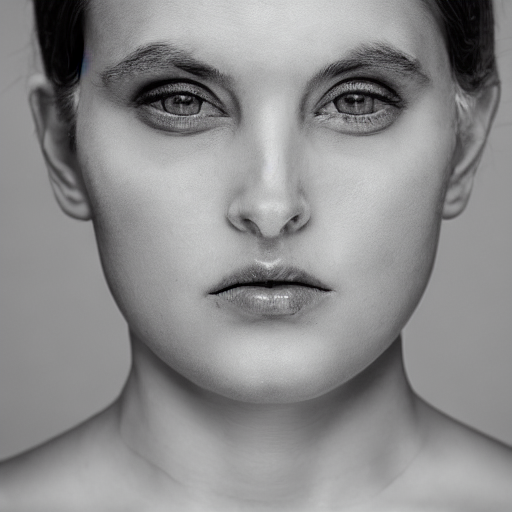

¡Generación completada!


In [ ]:
# Paso 6: Generar y mostrar la imagen con Stable Diffusion V1.5
print(f"Generando imagen con el prompt: '{prompt_v1_5}' (Stable Diffusion V1.5)...")
images_v1_5 = generar_imagen_v1_5(prompt_v1_5)

# Iteramos sobre la lista de imágenes generadas (aunque en este caso es solo una) y las mostramos.
for im in images_v1_5:
    display(im)
print("¡Generación completada!")


### Explicación de Stable Diffusion V1.5
Este modelo genera imágenes a partir de texto a través de un proceso de difusión latente. El modelo comienza con una imagen de ruido y, mediante un proceso de des-difusión progresiva, reconstruye la imagen basándose en la descripción proporcionada en el `prompt`.
Los parámetros clave que hemos utilizado son:
*   `guidance_scale`: Controla cuán fiel es el resultado al prompt. Valores más altos (como 7.5) hacen que la imagen se adhiera más a la descripción textual, pero pueden reducir la diversidad y, en ocasiones, introducir artefactos. Valores más bajos permiten al modelo más libertad creativa.
*   `num_inference_steps`: Define el número de pasos en el proceso de inferencia (des-difusión). Más pasos (ej., 50 o 100) generalmente resultan en imágenes de mayor calidad y detalle, pero aumentan el tiempo de procesamiento. Menos pasos (ej., 20-30) son más rápidos pero pueden producir imágenes menos refinadas.

### 3. Segundo Modelo: Stable Diffusion 2.1
Ahora, vamos a trabajar con una versión más avanzada: **Stable Diffusion 2.1**. Este modelo ofrece una calidad de imagen mejorada y una mayor capacidad para entender prompts detallados. Además, utilizaremos una optimización clave: la **precisión FP16**.

#### Ventajas de usar Stable Diffusion 2.1
-   **Calidad mejorada:** Produce imágenes más complejas, detalladas y, a menudo, de mayor resolución en comparación con las versiones anteriores (como V1.5).
-   **Eficiencia de memoria (con FP16):** Al usar la precisión `FP16` (Floating Point 16), el modelo utiliza menos memoria de la GPU. Esto es crucial en entornos con recursos limitados como Google Colab, permitiendo generar imágenes más grandes o ejecutar modelos más complejos.
-   **Manejo de prompts:** Puede interpretar y adherirse mejor a prompts más largos y descriptivos.

In [ ]:
# Cargamos el modelo preentrenado de Stable Diffusion 2.1
# Especificamos 'torch_dtype=torch.float16' para usar la precisión de punto flotante de 16 bits.
# Esto reduce a la mitad el uso de memoria del modelo en la GPU, lo que es ideal para Colab.
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16)

# Movemos el modelo a la GPU para mejorar el rendimiento.
# Si no tienes GPU, cambiar a 'cpu' hará que se ejecute en la CPU (será más lento).
pipe.to("cuda")


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.33.1",
  "_name_or_path": "stabilityai/stable-diffusion-2-1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
# Definimos una función para generar imágenes a partir de un prompt (similar a la anterior, pero específica para este modelo cargado)
def generar_imagen_v2_1(prompt):
    # Usamos los mismos parámetros de inferencia por defecto para comparar.
    images = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images
    return images


In [ ]:
# Prompt de ejemplo para un estilo fotográfico específico con Stable Diffusion 2.1
prompt_v2_1 = (
    "A calotype in black and white showing a swimming pool with people swimming, captured in dramatic lighting by Caravaggio, "
    "then colored with the vibrant and bright style of David Hockney. The scene is nostalgic yet energetic, blending classic and modern elements."
)


Generando imagen con el prompt: 'A calotype in black and white showing a swimming pool with people swimming, captured in dramatic lighting by Caravaggio, then colored with the vibrant and bright style of David Hockney. The scene is nostalgic yet energetic, blending classic and modern elements.' (Stable Diffusion 2.1)...


  0%|          | 0/50 [00:00<?, ?it/s]

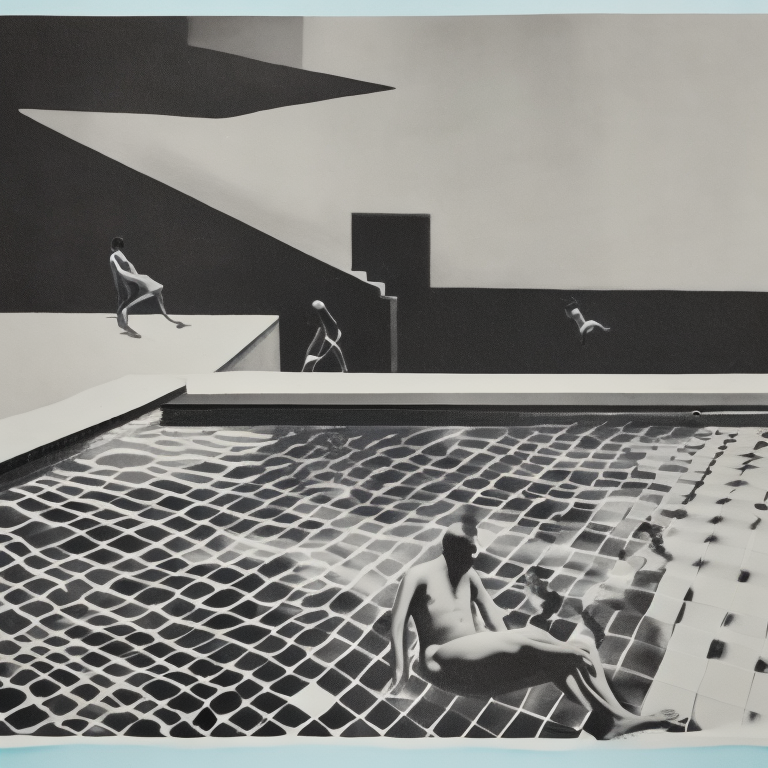

¡Generación completada!


In [ ]:
# Generamos y mostramos la imagen con Stable Diffusion 2.1
print(f"Generando imagen con el prompt: '{prompt_v2_1}' (Stable Diffusion 2.1)...")
images_v2_1 = generar_imagen_v2_1(prompt_v2_1)

for img in images_v2_1:
    display(img)
print("¡Generación completada!")


### 4. Comparación entre Stable Diffusion V1.5 y Stable Diffusion 2.1
La principal diferencia entre ambos modelos es que **Stable Diffusion 2.1** tiene mayor capacidad para capturar detalles y producir imágenes más complejas y de mayor resolución. Stable Diffusion 2.1 también maneja `prompts` más largos y descriptivos mejor que la versión V1.5.

Un `prompt` comparativo que podrían probar en ambos modelos para ver estas diferencias visualmente podría ser:

`A baroque-style portrait of a person, painted in the style of Caravaggio, with dramatic chiaroscuro, deep shadows, and warm highlights`

## Ajustando Parámetros de Generación
Los modelos de difusión ofrecen varios parámetros que podemos ajustar para controlar el proceso de generación y obtener diferentes resultados. Aquí exploraremos algunos de los más comunes.

### 1. Optimización del Uso de Memoria (Ajustando la Resolución)
Para evitar problemas de memoria en Google Colab, especialmente con GPUs limitadas, podemos reducir el tamaño de las imágenes generadas. Esto es particularmente útil cuando necesitamos generar múltiples imágenes o si la GPU se queda sin memoria con la resolución por defecto.

Generando imagen a baja resolución (256x256) con el prompt: 'A calotype in black and white showing a swimming pool with people swimming, captured in dramatic lighting by Caravaggio, then colored with the vibrant and bright style of David Hockney. The scene is nostalgic yet energetic, blending classic and modern elements.'...


  0%|          | 0/50 [00:00<?, ?it/s]

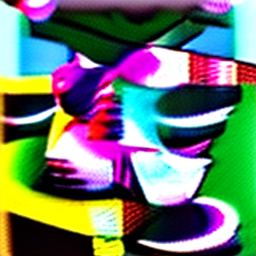

¡Generación de baja resolución completada!


In [ ]:
# Ajustamos las dimensiones de las imágenes generadas usando 'height' y 'width'.
# Las dimensiones por defecto suelen ser 512x512 o 768x768 dependiendo del modelo.
# Reducir esto a 256x256 consumirá mucha menos memoria de la GPU.
print(f"Generando imagen a baja resolución (256x256) con el prompt: '{prompt_v2_1}'...")
images_low_res = pipe(prompt_v2_1, height=256, width=256).images

# Mostramos las imágenes generadas
for img in images_low_res:
    display(img)
print("¡Generación de baja resolución completada!")


### 2. Ajustando el Número de Pasos de Inferencia (`num_inference_steps`)
Ya vimos que `num_inference_steps` define cuántos pasos de des-difusión realiza el modelo. Más pasos generalmente mejoran la calidad de la imagen y el detalle, pero también aumentan el tiempo de procesamiento y el uso de recursos.

Generando imagen con 100 pasos de inferencia con el prompt: 'A calotype in black and white showing a swimming pool with people swimming, captured in dramatic lighting by Caravaggio, then colored with the vibrant and bright style of David Hockney. The scene is nostalgic yet energetic, blending classic and modern elements.'...


  0%|          | 0/100 [00:00<?, ?it/s]

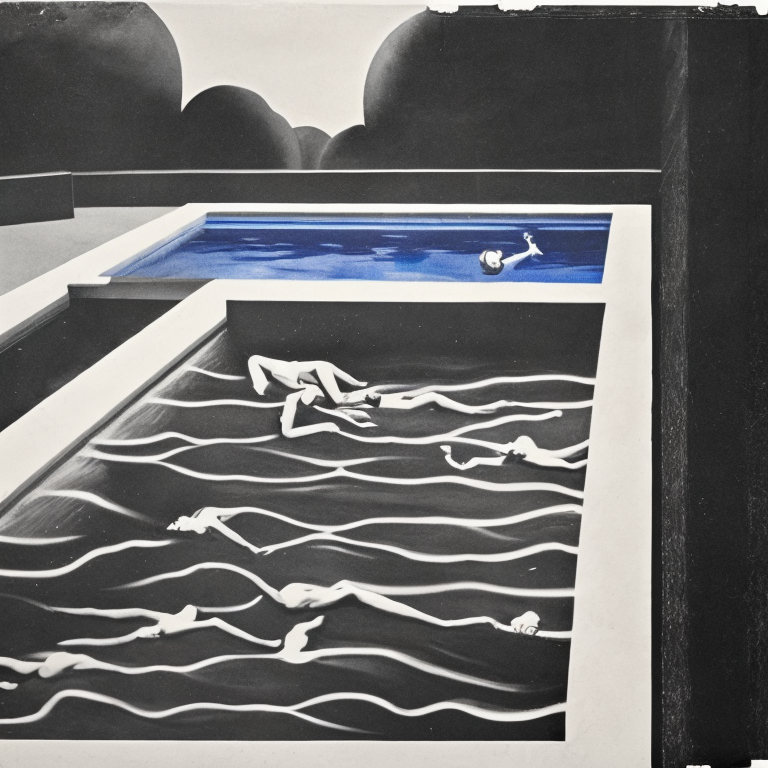

¡Generación con 100 pasos completada!


In [ ]:
# Ajustamos el número de pasos de inferencia a 100 para una mayor calidad.
# Comparar esta imagen con la generada con 50 pasos para notar la diferencia en detalle.
print(f"Generando imagen con 100 pasos de inferencia con el prompt: '{prompt_v2_1}'...")
images_100_steps = pipe(prompt_v2_1, num_inference_steps=100, guidance_scale=7.5).images

# Mostramos las imágenes generadas
for img in images_100_steps:
    display(img)
print("¡Generación con 100 pasos completada!")


### 3. Generar Múltiples Imágenes Simultáneamente (`num_images_per_prompt`)
Podemos generar varias imágenes al mismo tiempo a partir de un mismo `prompt` ajustando el parámetro `num_images_per_prompt`. Esto es útil para explorar diferentes interpretaciones del modelo y seleccionar la mejor.

Generando 3 imágenes simultáneamente con el prompt: 'A calotype in black and white showing a swimming pool with people swimming, captured in dramatic lighting by Caravaggio, then colored with the vibrant and bright style of David Hockney. The scene is nostalgic yet energetic, blending classic and modern elements.'...


  0%|          | 0/50 [00:00<?, ?it/s]

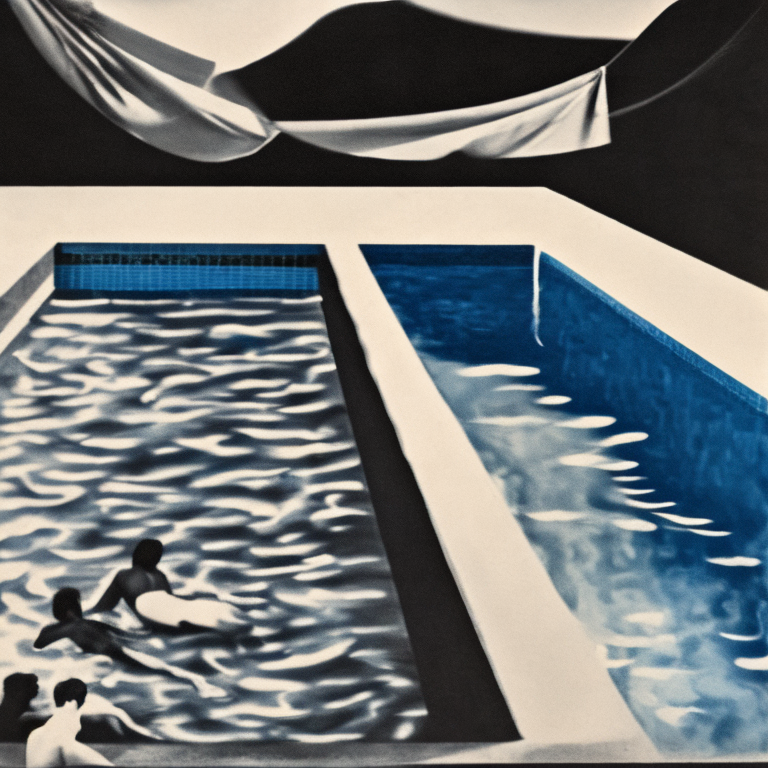

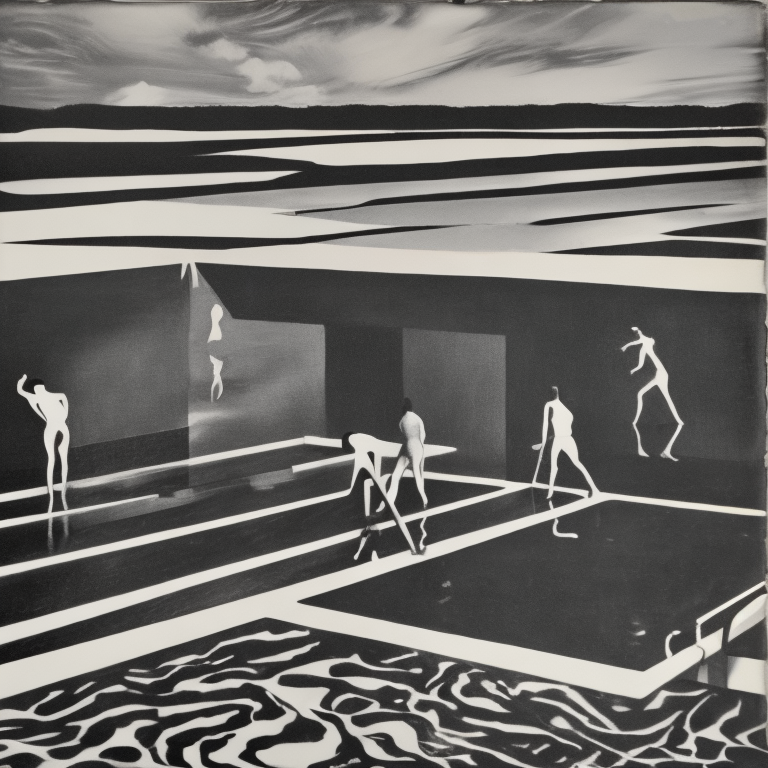

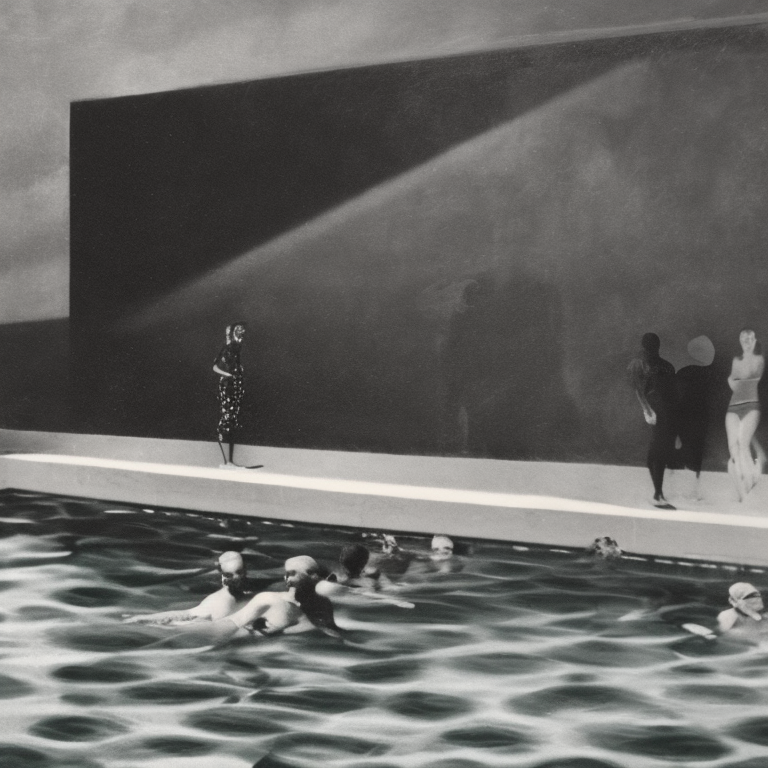

¡Generación de múltiples imágenes completada!


In [ ]:
# Generar 3 imágenes a la vez con el mismo prompt.
# Cada imagen será una variación diferente, ya que el punto de partida es ruido aleatorio.
print(f"Generando 3 imágenes simultáneamente con el prompt: '{prompt_v2_1}'...")
images_multiples = pipe(prompt_v2_1, num_images_per_prompt=3).images

# Mostramos las imágenes generadas
for img in images_multiples:
    display(img)
print("¡Generación de múltiples imágenes completada!")


## Extra: Explorando Stable Diffusion XL (SDXL)
Stable Diffusion XL (SDXL) representa la última generación de modelos de Stable Diffusion y ofrece una calidad de imagen aún superior, mayor resolución nativa y una mejor comprensión de `prompts` complejos. Es ideal para aplicaciones profesionales y resultados de alta fidelidad.

In [ ]:
# Aunque ya importamos algunas librerías, aquí re-importamos las específicas para SDXL para mayor claridad del bloque.
import torch
from IPython.display import display
from PIL import Image


In [ ]:
# Importamos la clase específica para usar Stable Diffusion XL.
# SDXL tiene una estructura de pipeline ligeramente diferente para manejar sus capacidades avanzadas.
from diffusers import StableDiffusionXLPipeline


In [ ]:
# Cargamos el modelo preentrenado de Stable Diffusion XL (SDXL Base 1.0).
# Este modelo es significativamente más grande y potente que las versiones anteriores.
# Nuevamente, usamos `torch_dtype=torch.float16` para optimizar el uso de memoria en la GPU.
print("Cargando Stable Diffusion XL (SDXL Base 1.0). Esto puede tardar unos minutos...")
pipe_xl = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16
)


In [ ]:
# Movemos el modelo a la GPU para aprovechar los recursos y hacer el procesamiento más rápido.
pipe_xl.to("cuda")
print("Modelo SDXL cargado y listo en la GPU.")


In [ ]:
# Definimos una función para generar imágenes específicamente con Stable Diffusion XL.
def generar_imagen_xl(prompt, num_images=1):
    # SDXL a menudo rinde mejor con un guidance_scale ligeramente más bajo o similar a 2.1.
    # Los num_inference_steps son también importantes para la calidad.
    images = pipe_xl(prompt, num_inference_steps=50, guidance_scale=7.5).images
    return images


In [ ]:
# Aquí puedes pedir a los estudiantes que escriban su propio prompt o usar uno predefinido.
# Este prompt es el mismo que usamos para V2.1 para facilitar la comparación de calidad.
prompt_xl = (
    "A calotype in black and white showing a swimming pool with people swimming, captured in dramatic lighting by Caravaggio, "
    "then colored with the vibrant and bright style of David Hockney. The scene is nostalgic yet energetic, blending classic and modern elements."
)


In [ ]:
# Llamamos a la función para generar la imagen con Stable Diffusion XL
print(f"Generando imagen con SDXL para el prompt: '{prompt_xl}'...")
images_xl = generar_imagen_xl(prompt_xl)

# Mostramos la imagen generada
for img in images_xl:
    display(img)
print("¡Generación con SDXL completada! Observa la mejora en detalle y realismo.")
